In [1]:
import numpy as np
import pandas as pd
import six
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D
%matplotlib inline

---
##PCA Demo - Visualization
---

---
##Demographic data from around the world
---

In [2]:
#get the dataset directly
df = pd.read_csv("https://raw.githubusercontent.com/TeachingDataScience/\
data-science-course/forstudentviewing/15_kmeans/un.csv")

In [3]:
df.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154,2848,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32,863,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52,11.1,9.9,67.5,70.3,44,1531,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print len(df.columns)
df.columns

14


Index([u'country', u'region', u'tfr', u'contraception', u'educationMale', u'educationFemale', u'lifeMale', u'lifeFemale', u'infantMortality', u'GDPperCapita', u'economicActivityMale', u'economicActivityFemale', u'illiteracyMale', u'illiteracyFemale'], dtype='object')

In [5]:
#Let's pick 4 features - male lifespan, female lifespan, infant mortality and GDP per capita
focus = ['country', 'lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita']
rfocus = ['lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita']

In [6]:
#Having 2 dataframes, just for ease of use, one with a country column, one without
#For this exercise drop the Nans
df_focus = df[focus].dropna()
df_rfocus = df_focus[rfocus]

In [7]:
df_focus.describe()

,lifeMale,lifeFemale,infantMortality,GDPperCapita
count,188.000000,188.000000,188.000000,188.000000
mean,63.526064,68.309043,44.308511,5890.595745
std,9.820235,11.085095,38.896964,8917.273130
min,36.000000,39.100000,3.000000,36.000000
25%,57.275000,58.625000,12.000000,426.500000
50%,66.500000,71.950000,30.500000,1654.500000
75%,70.675000,76.250000,71.250000,6730.500000
max,77.400000,82.900000,169.000000,42416.000000


In [8]:
df_focus.head()

,country,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,45.0,46.0,154,2848
1,Albania,68.0,74.0,32,863
2,Algeria,67.5,70.3,44,1531
5,Angola,44.9,48.1,124,355
7,Argentina,69.6,76.8,22,8055


---
##The aim is to plot the 4-dimensional data!!
###which we, obviously, cannot do
###So reduce the data to 2-D, and plot that
---

In [19]:
#fit a PCA model and transform the dataset
#NB PCA does not require any data labels
myPCA = PCA(n_components = 2).fit(df_rfocus)

#The transformed data has only 2 dimensions
new_data = myPCA.transform(df_rfocus)
print new_data.shape

(188, 2)


In [11]:
#What countries do we have data for (the 4 features in question)

for i in xrange(len(df_focus)):
    print df.loc[i].country,

Afghanistan Albania Algeria American.Samoa Andorra Angola Antigua Argentina Armenia Australia Austria Azerbaijan Bahamas Bahrain Bangladesh Barbados Belarus Belgium Belize Benin Bhutan Bolivia Bosnia Botswana Brazil Brunei Bulgaria Burkina.Faso Burundi Cambodia Cameroon Canada Cape.Verde Central.African.Rep Chad Chile China Colombia Comoros Congo Cook.Islands Costa.Rica Croatia Cuba Cyprus Czech.Republic Dem.Rep.of.the.Congo Denmark Djibouti Dominica Dominican.Republic East.Timor Ecuador Egypt El.Salvador Equatorial.Guinea Eritrea Estonia Ethiopia Fiji Finland France French.Guiana French.Polynesia Gabon Gambia Gaza.Strip Georgia Germany Ghana Greece Grenada Guadeloupe Guam Guatemala Guinea Guinea.Bissau Guyana Haiti Honduras Hong.Kong Hungary Iceland India Indonesia Iran Iraq Ireland Israel Italy Ivory.Coast Jamaica Japan Jordan Kazakhstan Kenya Kiribati Korea.Dem.Peoples.Rep Korea.Republic.of Kuwait Kyrgyzstan Laos Latvia Lebanon Lesotho Liberia Libya Liechtenstein Lithuania Luxembour

In [15]:
#Let's make sure we can have a wide array of colors for matplotlib
#Six is a Python 2 and 3 compatibility library. It provides utility 
#functions for smoothing over the differences between the Python 
#versions with the goal of writing Python code that is compatible 
#on both Python versions.
my_colors_list = list(six.iteritems(colors.cnames))
print len(my_colors_list)

150


In [18]:
#Now choose 30 countries at random
np.random.seed(2)
r = np.random.randint(0, len(df_focus), 30)
the_country_list = []
for i in xrange(30):
    the_country_list.append(df.loc[r[i]].country)
print the_country_list

['Slovenia', 'Barbados', 'Guadeloupe', 'Bosnia', 'Cuba', 'Guinea', 'Lesotho', 'Argentina', 'Saudi.Arabia', 'Swaziland', 'Kenya', 'Guinea', 'Denmark', 'French.Polynesia', 'Canada', 'Philippines', 'Moldova', 'Mali', 'Colombia', 'Slovakia', 'Latvia', 'Andorra', 'Somalia', 'Liechtenstein', 'East.Timor', 'Lebanon', 'Comoros', 'Central.African.Rep', 'Ethiopia', 'Moldova']


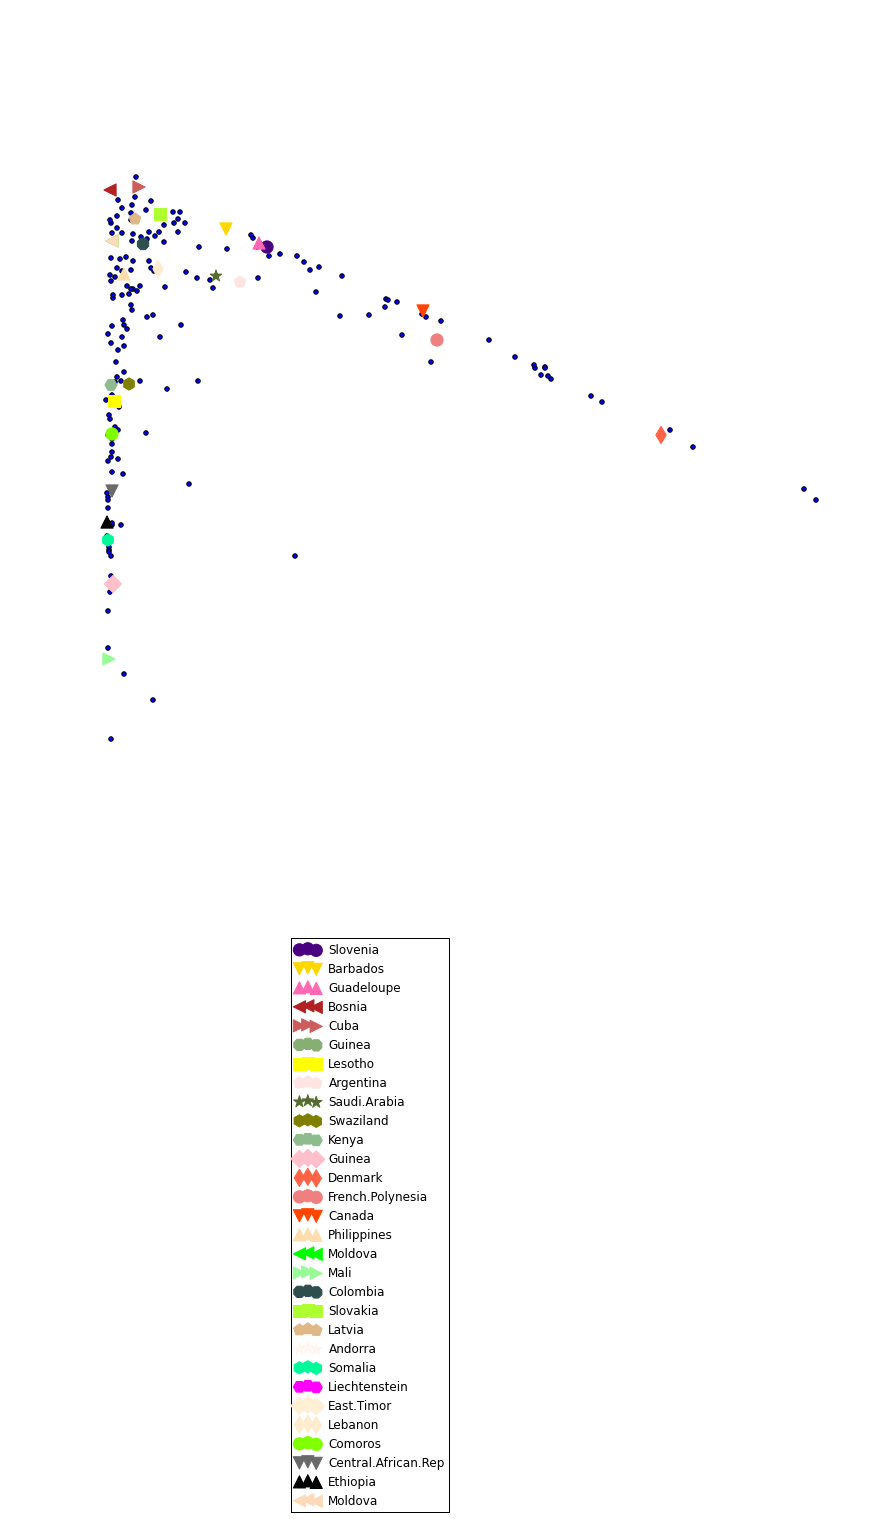

In [20]:
#Now let's plot the 2-D data

fig = plt.figure(figsize = (15,15))
ax = plt.subplot(111)

#plot the entire transformed dataset
ax.scatter(new_data[:,0], new_data[:,1])

#Some matplotlib stuff we haven't yet seen
#To do this you have to import FontProperties (see the first cell)
fontP = FontProperties()
fontP.set_size('large')

#if you prefer you can make up a dedicated country list - remember not all countries are present because
#some got excluded when we did dropna()
#the_country_list = ['Afghanistan', 'Australia', 'Burkina.Faso', 'Germany','Hong.Kong']

#Loop over the country list and plot the point for that country in a unique color and a somewhat unique marker
#Line2D must be imported - see the first cell. It contains all the filled markers available for matplotlib
for i, the_country in enumerate(the_country_list):
    ax.scatter(myPCA.transform(df_focus[df_focus.country == the_country][rfocus])[:,0], 
            myPCA.transform(df_focus[df_focus.country == the_country][rfocus])[:,1], 
            color=my_colors_list[i % 150][0], 
            marker = Line2D.filled_markers[i % 13],
            s=150,
            label = the_country)
    
#Since the x and y axes don't mean anything, switch them off
ax.set_axis_off()

#Move the legend out of the plot
ax.legend(bbox_to_anchor=(0.5, -0.1), prop = fontP)

---
##Remember this is converted 4-D data, measuring a number of things
##Hopefully you might see clusters of similar countries on the plot, all of whom have similar metrics as measured by the original features
---